In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/employee_attrition.csv")

In [3]:
df.head()

,EmployeeID,Age,Gender,Department,MonthlyIncome,YearsAtCompany,OverTime,JobSatisfaction,WorkLifeBalance,TrainingTimesLastYear,Attrition
0,1,38.0,Male,HR,0.000000,0.40,No,2.0,3,0.5,No
1,2,33.0,Male,HR,0.075385,0.25,No,2.0,2,0.3,No
2,3,40.0,Female,Sales,0.136375,0.70,No,1.0,2,0.5,No
3,4,47.0,Male,HR,0.174409,0.60,No,3.0,3,0.2,No
4,5,33.0,Female,IT,0.153290,0.20,No,NaN,3,0.1,Yes


In [4]:
df.columns

Index(['EmployeeID', 'Age', 'Gender', 'Department', 'MonthlyIncome',
       'YearsAtCompany', 'OverTime', 'JobSatisfaction', 'WorkLifeBalance',
       'TrainingTimesLastYear', 'Attrition'],
      dtype='object')

In [5]:
df.shape

(8400, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EmployeeID             8400 non-null   int64  
 1   Age                    7561 non-null   float64
 2   Gender                 8400 non-null   object 
 3   Department             8400 non-null   object 
 4   MonthlyIncome          7556 non-null   float64
 5   YearsAtCompany         8400 non-null   float64
 6   OverTime               8400 non-null   object 
 7   JobSatisfaction        7567 non-null   float64
 8   WorkLifeBalance        8400 non-null   int64  
 9   TrainingTimesLastYear  8400 non-null   float64
 10  Attrition              8400 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 722.0+ KB


### Statistical Analysis

In [8]:
df.describe()

,EmployeeID,Age,MonthlyIncome,YearsAtCompany,JobSatisfaction,WorkLifeBalance,TrainingTimesLastYear
count,8400.000000,7561.000000,7556.000000,8400.000000,7567.000000,8400.000000,8400.000000
mean,3994.265952,34.657849,0.191155,0.296810,2.189771,2.543690,0.226202
std,2311.555446,7.633779,0.157068,0.204295,1.015183,0.982885,0.148470
min,1.000000,22.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1987.750000,29.000000,0.062035,0.150000,1.000000,2.000000,0.100000
50%,3990.500000,34.000000,0.167131,0.300000,2.000000,3.000000,0.200000
75%,6002.000000,40.000000,0.288324,0.450000,3.000000,3.000000,0.300000
max,8000.000000,60.000000,1.000000,1.000000,4.000000,4.000000,1.000000


In [9]:
# Drop employee ID since its a unique value we do not need
df.drop(columns="EmployeeID", inplace=True)

In [10]:
df.head()

,Age,Gender,Department,MonthlyIncome,YearsAtCompany,OverTime,JobSatisfaction,WorkLifeBalance,TrainingTimesLastYear,Attrition
0,38.0,Male,HR,0.000000,0.40,No,2.0,3,0.5,No
1,33.0,Male,HR,0.075385,0.25,No,2.0,2,0.3,No
2,40.0,Female,Sales,0.136375,0.70,No,1.0,2,0.5,No
3,47.0,Male,HR,0.174409,0.60,No,3.0,3,0.2,No
4,33.0,Female,IT,0.153290,0.20,No,NaN,3,0.1,Yes


#### Missing Values

In [12]:
## Check for Missing Values
df.isnull().sum()

Age                      839
Gender                     0
Department                 0
MonthlyIncome            844
YearsAtCompany             0
OverTime                   0
JobSatisfaction          833
WorkLifeBalance            0
TrainingTimesLastYear      0
Attrition                  0
dtype: int64

In [13]:
# Missing values by Percentage(%)
df.isnull().mean()*100

Age                       9.988095
Gender                    0.000000
Department                0.000000
MonthlyIncome            10.047619
YearsAtCompany            0.000000
OverTime                  0.000000
JobSatisfaction           9.916667
WorkLifeBalance           0.000000
TrainingTimesLastYear     0.000000
Attrition                 0.000000
dtype: float64

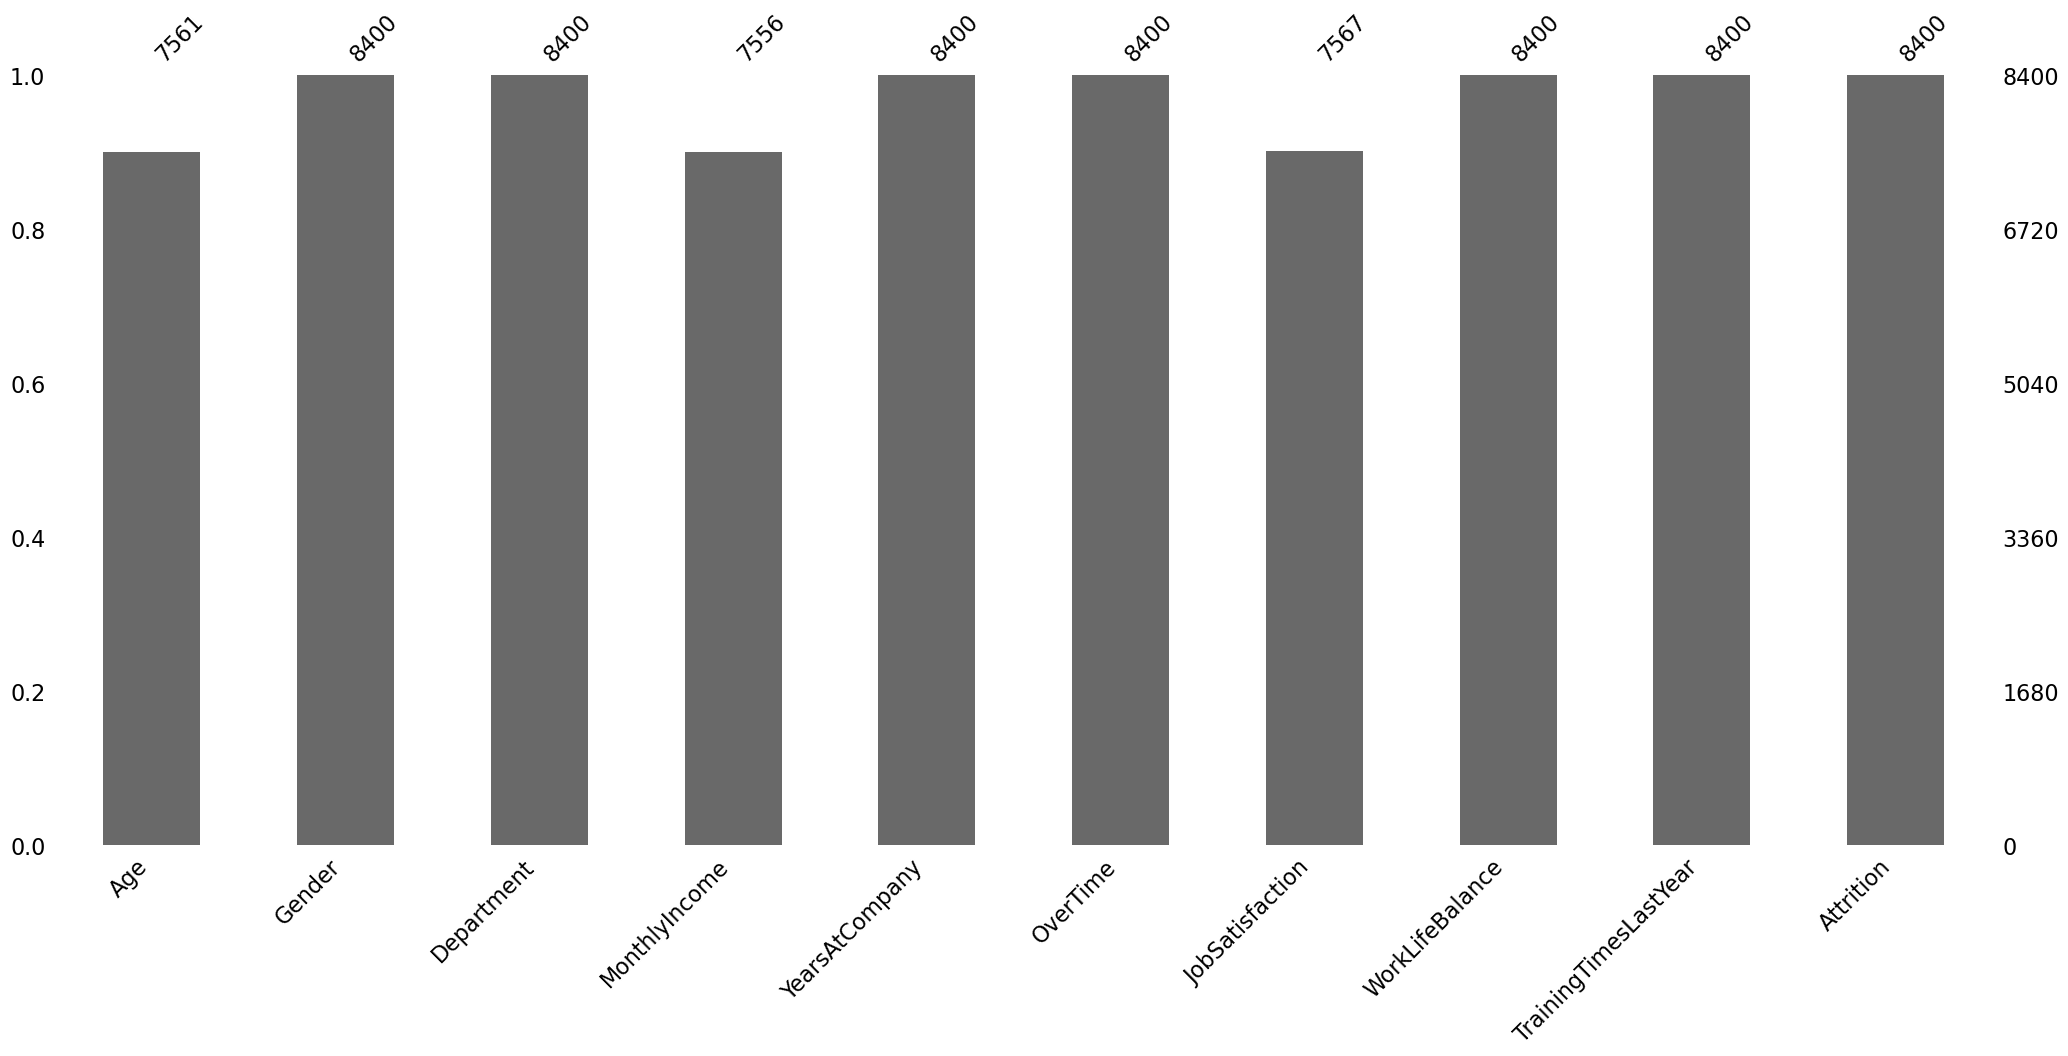

In [14]:
# Visualise out Missing value
import missingno as msno

msno.bar(df);

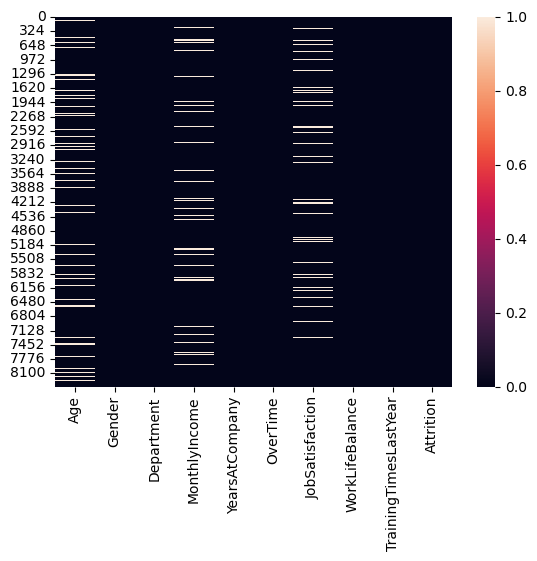

In [15]:
# Check the heatmap of Missing numbers
sns.heatmap(df.isna());

In [16]:
# Fill in missing Values

# Use (Median to avoid outliers)
df["Age"] = df["Age"].fillna(df["Age"].median())
df["MonthlyIncome"] = df["MonthlyIncome"].fillna(df["MonthlyIncome"].median())

In [17]:
# Use median (to get series) (series has an index and value)

df["JobSatisfaction"] = df["JobSatisfaction"].fillna(df["JobSatisfaction"].mode()[0])

### Remove Duplicates

In [19]:
# Check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8395     True
8396     True
8397     True
8398     True
8399     True
Length: 8400, dtype: bool

In [20]:
# Check for duplicates in dataset table
df[df.duplicated()]

,Age,Gender,Department,MonthlyIncome,YearsAtCompany,OverTime,JobSatisfaction,WorkLifeBalance,TrainingTimesLastYear,Attrition
2804,34.0,Male,Sales,0.000000,0.25,No,2.0,3,0.1,No
4010,35.0,Female,Sales,0.000000,0.35,No,1.0,4,0.1,No
4038,34.0,Male,Sales,0.000000,0.30,Yes,2.0,3,0.3,No
4725,22.0,Male,Finance,0.167131,0.00,Yes,1.0,3,0.2,No
5240,34.0,Female,Sales,0.000000,0.40,Yes,1.0,1,0.2,Yes
...,...,...,...,...,...,...,...,...,...,...
8395,28.0,Male,IT,0.000000,0.20,Yes,1.0,1,0.8,No
8396,40.0,Male,Finance,0.299006,0.35,No,4.0,2,0.2,No
8397,34.0,Female,Sales,0.000000,0.20,Yes,2.0,1,0.1,No
8398,29.0,Male,Operations,0.254311,0.20,No,1.0,3,0.3,Yes


In [21]:
# Remove duplicates ( because the duplicated data won't add any new information to our model (nb. we want unique data))
# reset index and reassign
df = df.drop_duplicates().reset_index(drop=True)

In [22]:
# Outliers

numerical_features = df.select_dtypes(exclude="object")
numerical_features.shape

(7992, 6)

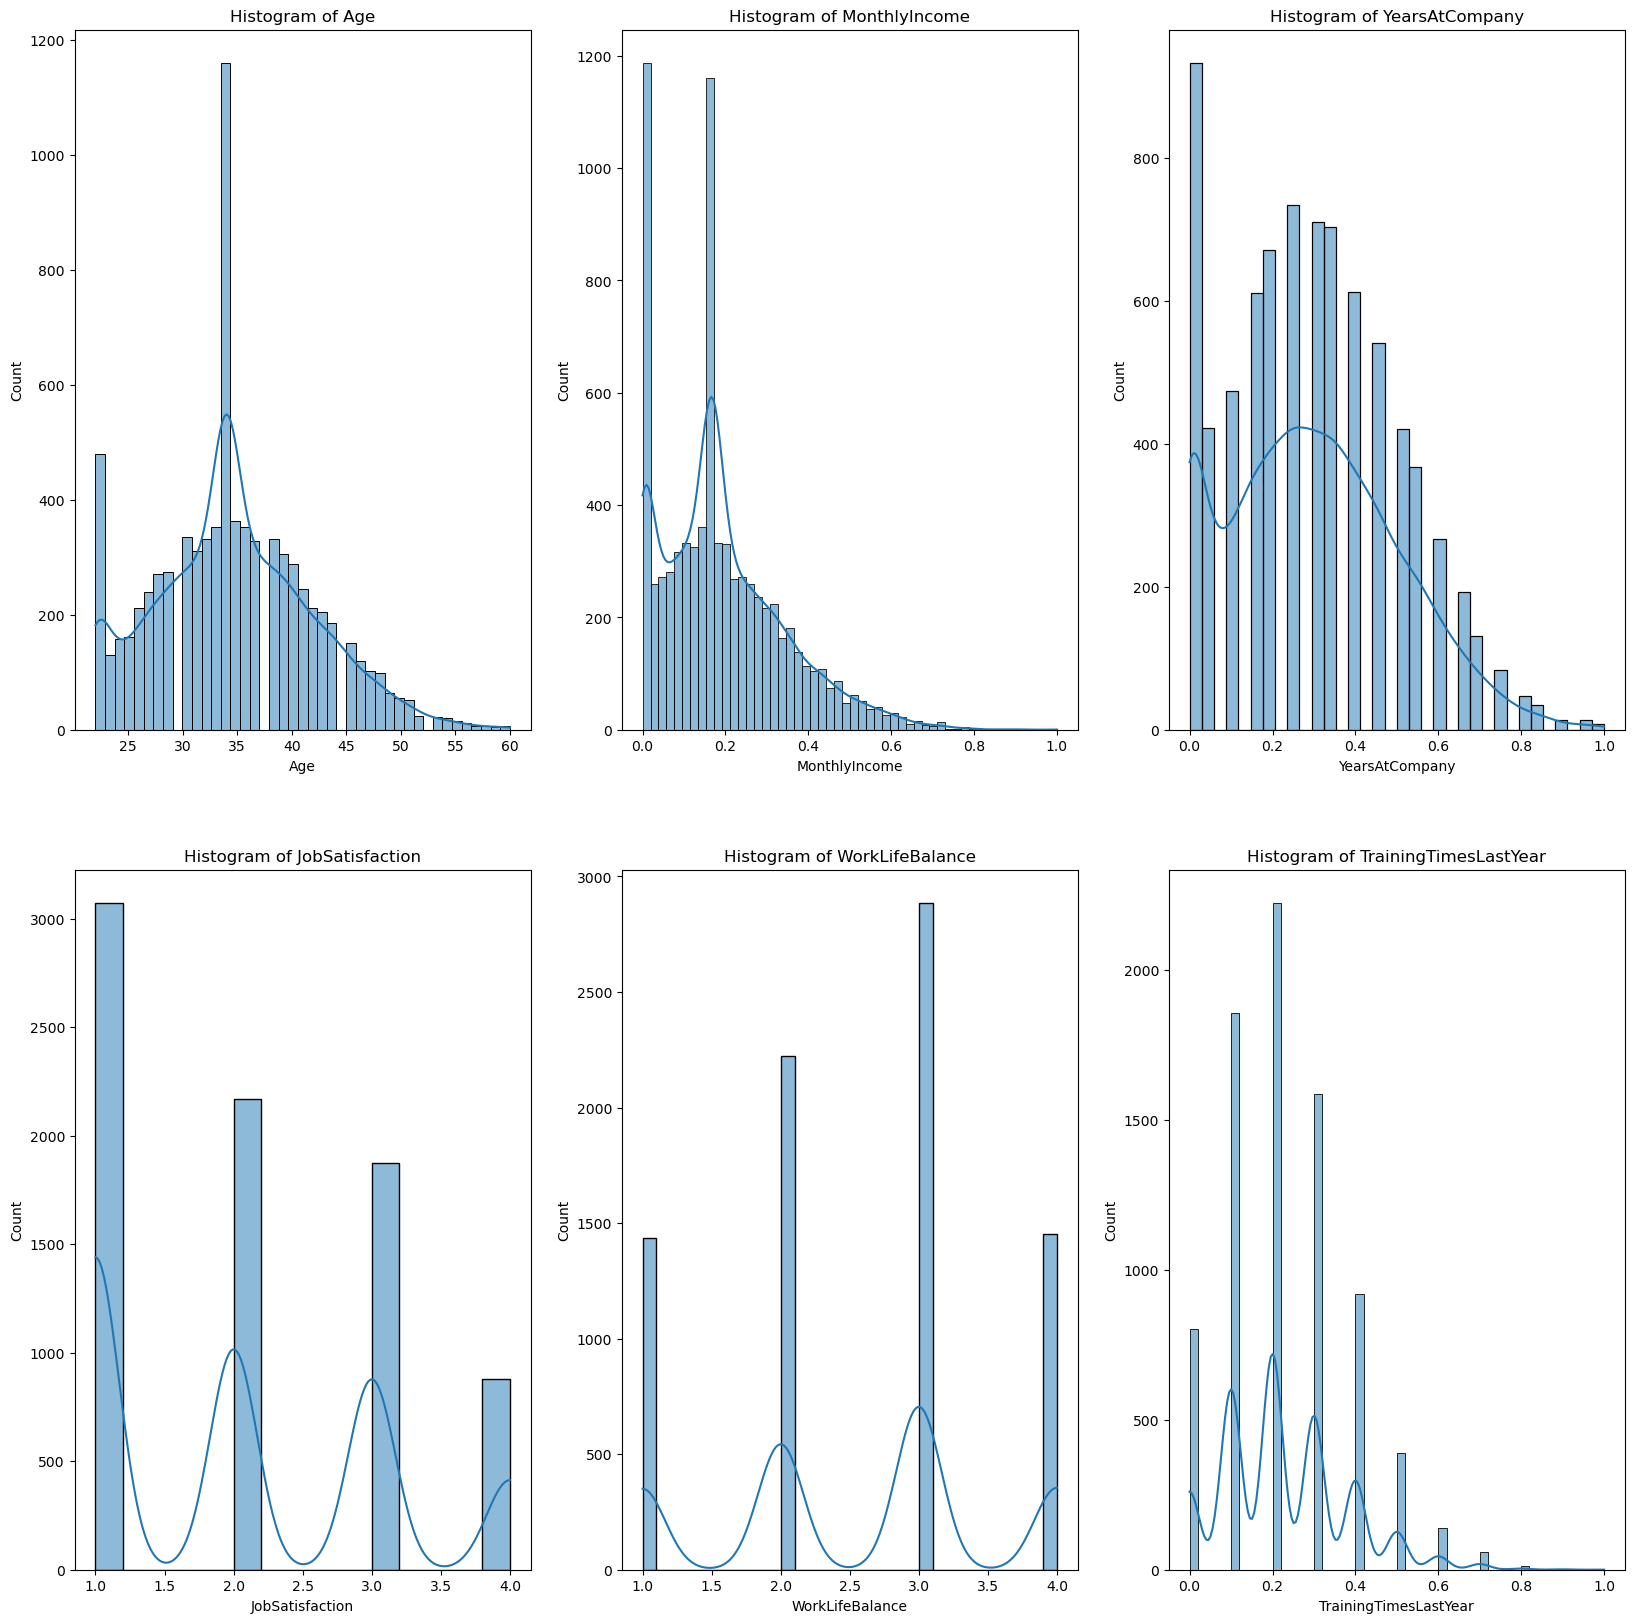

In [23]:
numerical_features = df.select_dtypes(exclude="object")

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,20))
ax = ax.flatten() # To specify the position i want the graph
for i, col in enumerate(numerical_features):
    sns.histplot(df[col], ax=ax[i], kde=True) # KDE - kernel density (draws a line over the graph)
    ax[i].set_title(f"Histogram of {col}")

plt.show()

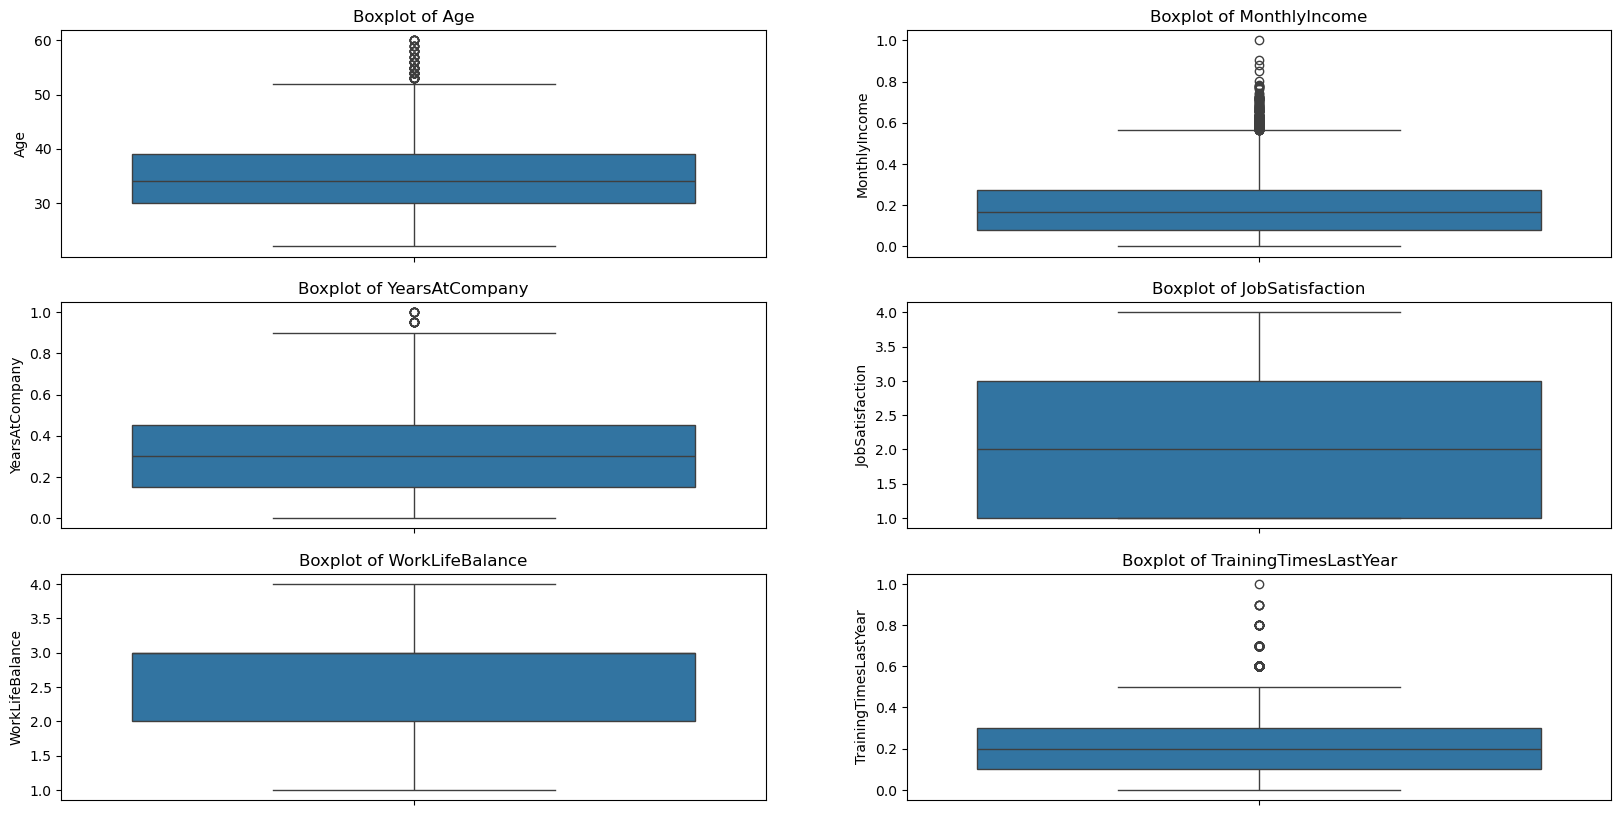

In [24]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))
ax = ax.flatten()
for i, col in enumerate(numerical_features):
    sns.boxplot(df[col], ax=ax[i])
    ax[i].set_title(f"Boxplot of {col}")
    
plt.show()

In [25]:
# Calculate the 75th and 25th percentile using the quantile function

cols = ["Age", "MonthlyIncome", "YearsAtCompany", "TrainingTimesLastYear"]
q3 = df[cols].quantile(0.75)
q1 = df[cols].quantile(0.25)

iqr = q3 - q1
lowerbound = q1 - (1.5*iqr)
upperbound = q3 + (1.5*iqr)

df[cols] = df[cols].clip(lower=lowerbound, upper=upperbound, axis=1)
df[cols]

,Age,MonthlyIncome,YearsAtCompany,TrainingTimesLastYear
0,38.0,0.000000,0.40,0.5
1,33.0,0.075385,0.25,0.3
2,40.0,0.136375,0.70,0.5
3,47.0,0.174409,0.60,0.2
4,33.0,0.153290,0.20,0.1
...,...,...,...,...
7987,52.0,0.334159,0.80,0.3
7988,37.0,0.000000,0.15,0.1
7989,28.0,0.109883,0.10,0.3
7990,34.0,0.092938,0.65,0.1


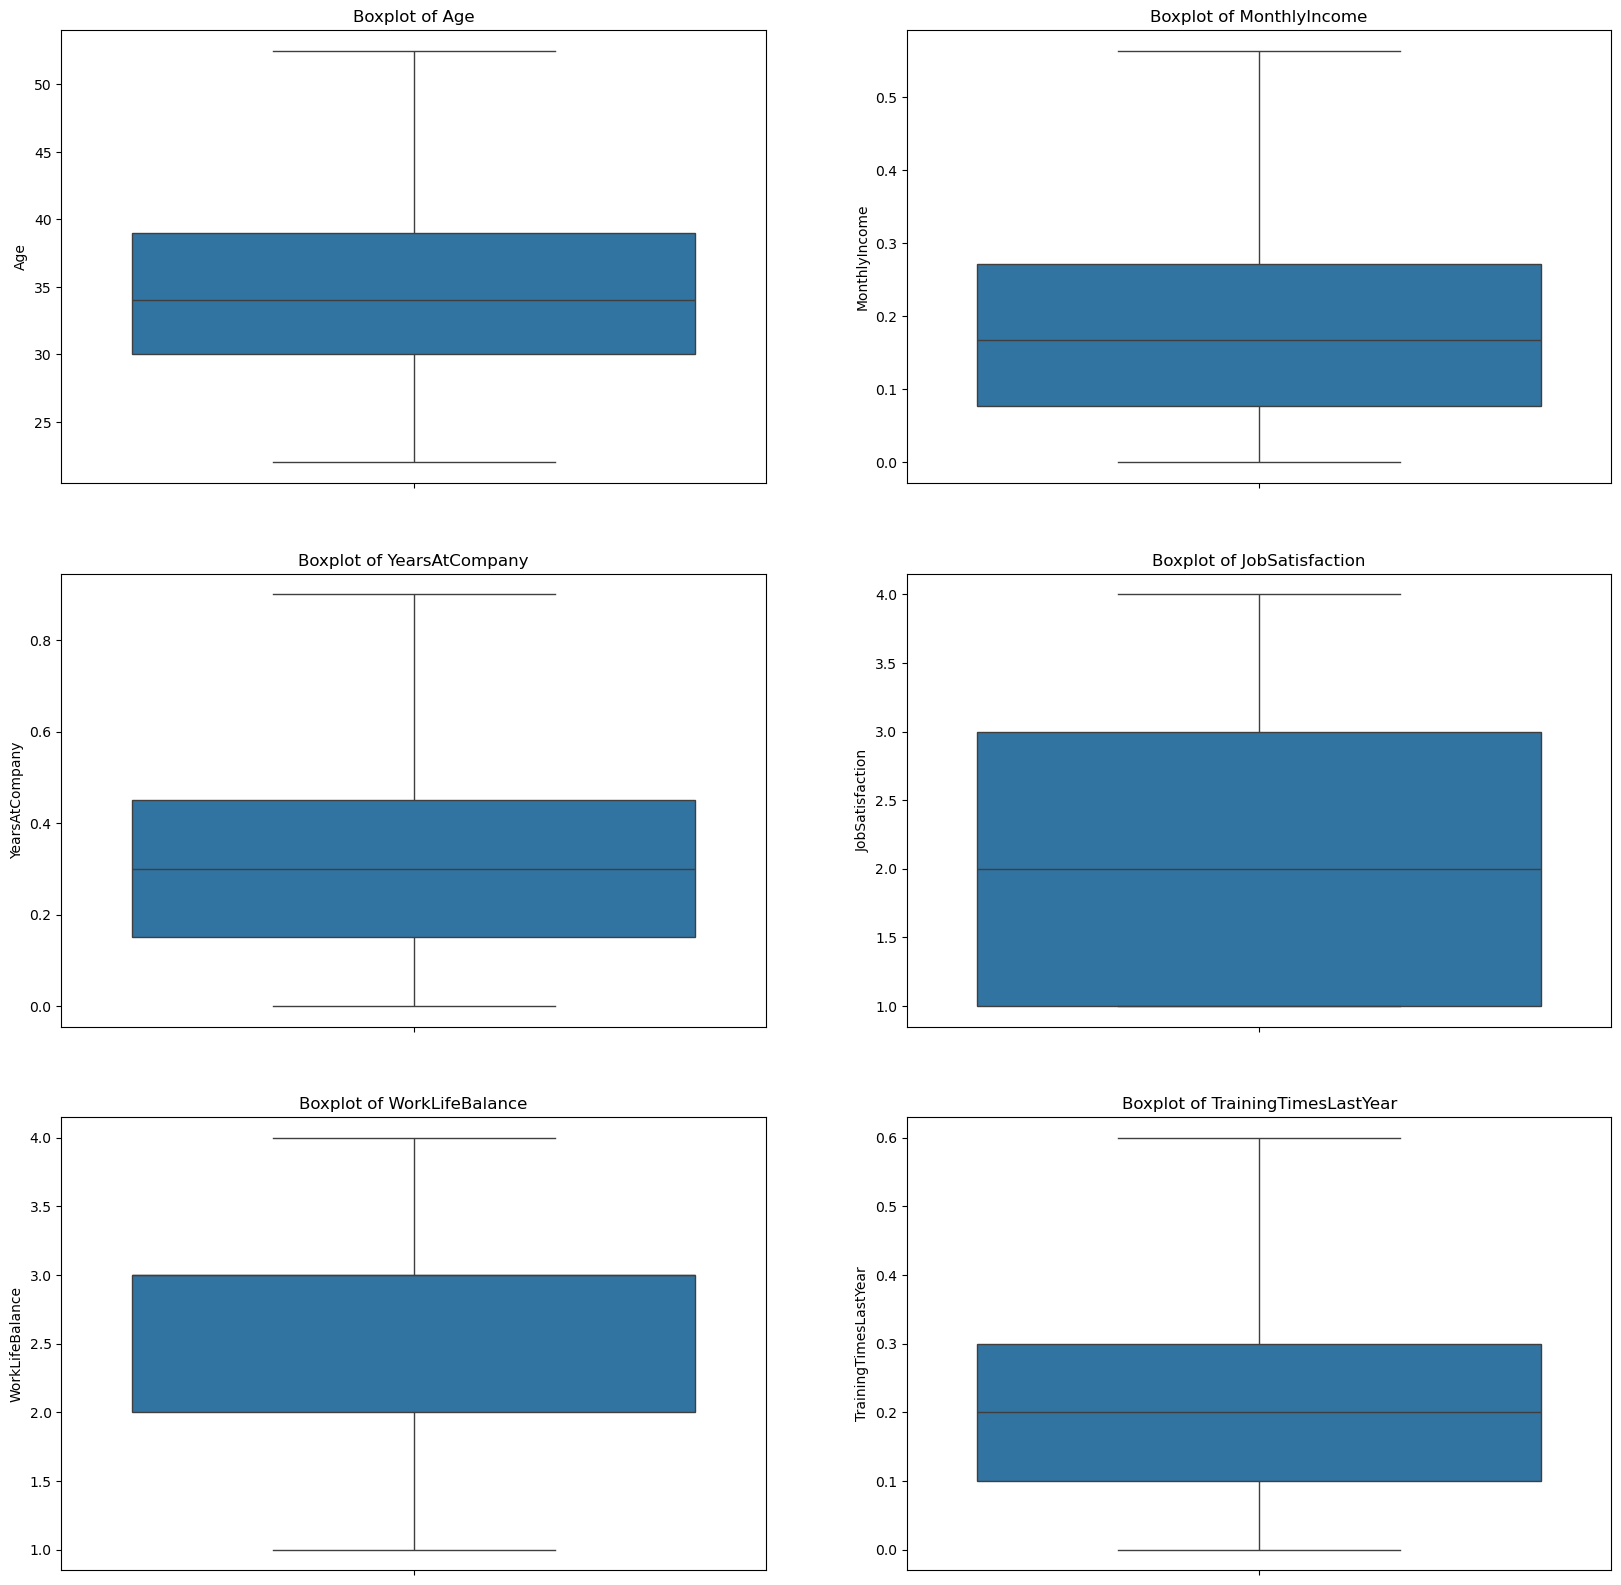

In [26]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
ax = ax.flatten()
for i, col in enumerate(numerical_features):
    sns.boxplot(df[col], ax=ax[i])
    ax[i].set_title(f"Boxplot of {col}")
    
plt.show()

In [27]:
# Label Encoding
categorical_data = df.select_dtypes(include="object")

for col in categorical_data.columns:
    print(col, categorical_data[col].nunique())

Gender 2
Department 5
OverTime 2
Attrition 2


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
# Label encoding for binary categories
label_enc = LabelEncoder()
df['Gender'] = label_enc.fit_transform(df['Gender'])  
df['OverTime'] = label_enc.fit_transform(df['OverTime'])
df['Attrition'] = label_enc.fit_transform(df['Attrition'])

In [30]:
df.head()

,Age,Gender,Department,MonthlyIncome,YearsAtCompany,OverTime,JobSatisfaction,WorkLifeBalance,TrainingTimesLastYear,Attrition
0,38.0,1,HR,0.000000,0.40,0,2.0,3,0.5,0
1,33.0,1,HR,0.075385,0.25,0,2.0,2,0.3,0
2,40.0,0,Sales,0.136375,0.70,0,1.0,2,0.5,0
3,47.0,1,HR,0.174409,0.60,0,3.0,3,0.2,0
4,33.0,0,IT,0.153290,0.20,0,1.0,3,0.1,1


In [31]:
df = pd.get_dummies(df, columns=["Department"], drop_first=True)

In [32]:
df.head()

,Age,Gender,MonthlyIncome,YearsAtCompany,OverTime,JobSatisfaction,WorkLifeBalance,TrainingTimesLastYear,Attrition,Department_HR,Department_IT,Department_Operations,Department_Sales
0,38.0,1,0.000000,0.40,0,2.0,3,0.5,0,True,False,False,False
1,33.0,1,0.075385,0.25,0,2.0,2,0.3,0,True,False,False,False
2,40.0,0,0.136375,0.70,0,1.0,2,0.5,0,False,False,False,True
3,47.0,1,0.174409,0.60,0,3.0,3,0.2,0,True,False,False,False
4,33.0,0,0.153290,0.20,0,1.0,3,0.1,1,False,True,False,False


#### Scaling the Numerical Features

In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [35]:
scaler = StandardScaler()
num_cols_to_scale = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'TrainingTimesLastYear']
df[cols] = scaler.fit_transform(df[num_cols_to_scale])

In [36]:
df[cols]

,Age,MonthlyIncome,YearsAtCompany,TrainingTimesLastYear
0,0.479168,-1.301722,0.503833,1.900458
1,-0.221194,-0.778837,-0.232387,0.519124
2,0.759312,-0.355796,1.976274,1.900458
3,1.739818,-0.091983,1.485460,-0.171543
4,-0.221194,-0.238470,-0.477794,-0.862210
...,...,...,...,...
7987,2.440180,1.016074,2.467087,0.519124
7988,0.339095,-1.301722,-0.723201,-0.862210
7989,-0.921556,-0.539552,-0.968608,0.519124
7990,-0.081122,-0.657083,1.730867,-0.862210


In [37]:
# Check for balance in the Data ( this is to avoid bias)
df["Attrition"].value_counts()

Attrition
0    5957
1    2035
Name: count, dtype: int64

In [38]:
df["Attrition"].value_counts(normalize=True)*100

Attrition
0    74.537037
1    25.462963
Name: proportion, dtype: float64

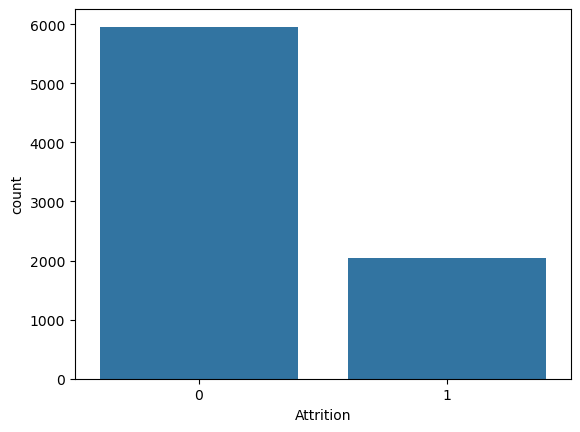

In [39]:
sns.countplot(x=df["Attrition"]);

In [40]:
# Oversampling Method for Resampling
from imblearn.over_sampling import SMOTE


In [41]:
# Split our samples to X and Y (axis) for the sampling
x = df.drop("Attrition", axis=1)
y = df["Attrition"]

In [47]:
# Resampling
smote = SMOTE(random_state=42)
X_resample, y_resample = smote.fit_resample(x,y)

In [49]:
y_resample.value_counts()

Attrition
0    5957
1    5957
Name: count, dtype: int64

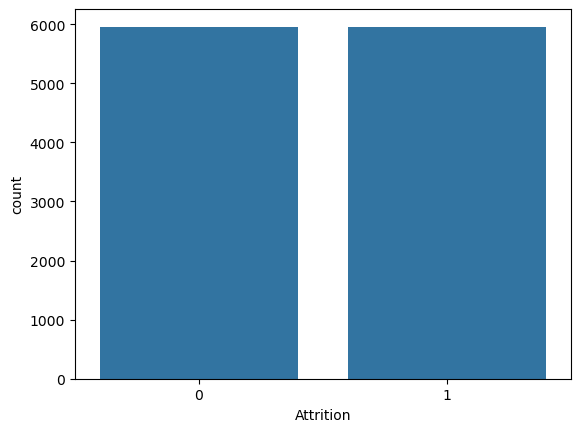

In [44]:
sns.countplot(x=y_resample);

In [51]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, random_state=42, test_size=0.2, stratify=y_resample)

In [55]:
print("Training set size", len(X_train))
print("Training set size", len(X_test))


Training set size 9531
Training set size 2383


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

In [61]:
# Build first model
model_LR = LogisticRegression(random_state=42)
model_LR.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [63]:
# Train second model
model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluation

In [66]:
# Evaluation

from sklearn.metrics import classification_report, confusion_matrix

In [68]:
y_pred = model_LR.predict(X_train)

print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       0.55      0.56      0.55      4678
           1       0.57      0.56      0.56      4853

    accuracy                           0.56      9531
   macro avg       0.56      0.56      0.56      9531
weighted avg       0.56      0.56      0.56      9531



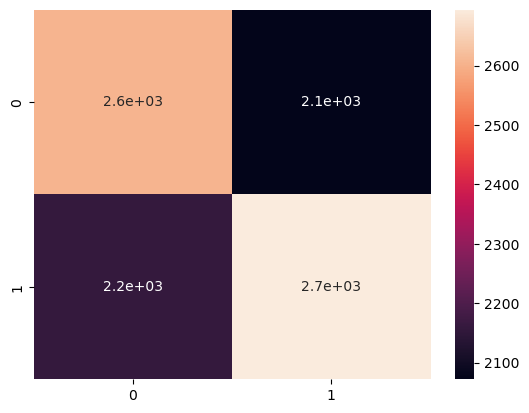

In [70]:
cm = confusion_matrix(y_pred, y_train)

sns.heatmap(cm, annot=True);

In [72]:
y_pred = model_LR.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.53      0.56      0.54      1129
           1       0.58      0.55      0.57      1254

    accuracy                           0.55      2383
   macro avg       0.55      0.55      0.55      2383
weighted avg       0.56      0.55      0.55      2383



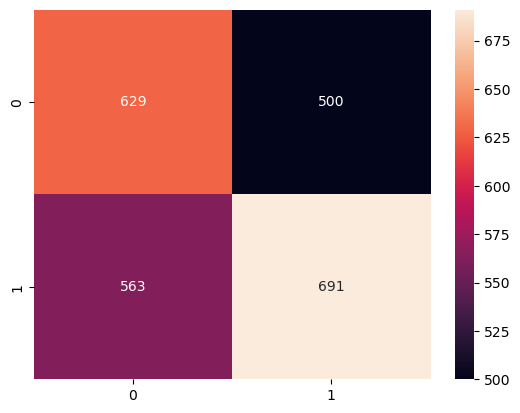

In [74]:
cm = confusion_matrix(y_pred, y_test)

sns.heatmap(cm, annot=True, fmt="g");

In [76]:
y_pred = model_RF.predict(X_train)

print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4765
           1       1.00      1.00      1.00      4766

    accuracy                           1.00      9531
   macro avg       1.00      1.00      1.00      9531
weighted avg       1.00      1.00      1.00      9531



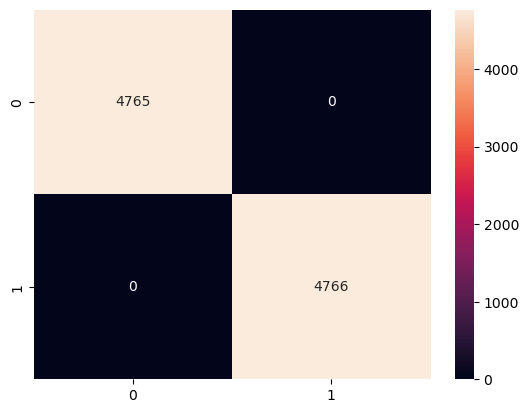

In [78]:
cm = confusion_matrix(y_pred, y_train)

sns.heatmap(cm, annot=True, fmt="g");

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1302
           1       0.78      0.86      0.81      1081

    accuracy                           0.82      2383
   macro avg       0.82      0.83      0.82      2383
weighted avg       0.83      0.82      0.82      2383



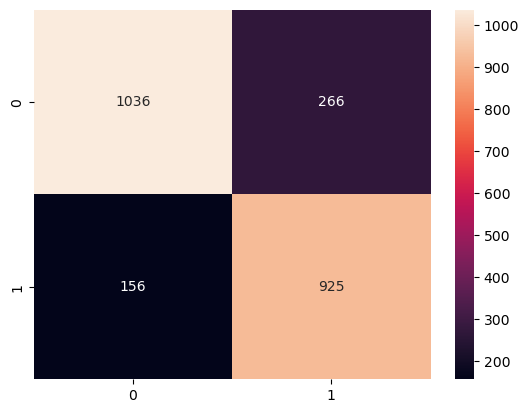

In [80]:
y_pred = model_RF.predict(X_test)

print(classification_report(y_pred, y_test))

cm = confusion_matrix(y_pred, y_test)

sns.heatmap(cm, annot=True, fmt="g");